[Home](../../README.md)

### Model Evaluation

I have chosen a **polynominal regression** approach after evaluating the model through:

* Linear regression
* Multiple variable linear regression
* Polynominal regression

We will also be calcluating the cost and loss, which can allow for comparisions and optimisation parameters. Additionally, we will evaluate x-axis intercept and coefficient values to directly indicate which features have the strongest influence on bike demand, helping prioritize which factors to focus on in business decisions. Additionally, tracking this after deployment can also identify seasonal patterns or degradation in model performance that may require retraining

* **(I noticed I got varying/inconsistent results when overwriting model ready data without changes)**

### Linear regression

#### Step 1

Load the required dependencies.


In [8]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [9]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [10]:
x_col = 'Temp'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Count'])

* `reshape(-1,1)` is required as scikit-learn only allows 2D arrays

* Using temperature (`x_col`) to predict bike count (`y_test`)

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

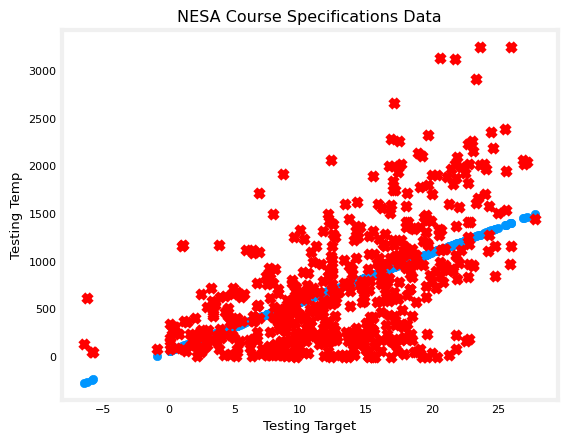

In [11]:
y_pred = model_A.predict(x_test)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [12]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.3167328681925492


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

* We will multiply values `* 1000` due to scaling

    * We could also use StandardScaler

In [13]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     Date  Count  Predicted result    Loss
0     9.7      0        559.297789 -559.30
1    25.6   1944       1382.970371  561.03
2     6.7    178        403.887868 -225.89
3    11.5    502        652.543742 -150.54
4     4.5    514        289.920593  224.08
..    ...    ...               ...     ...
547  13.8    531        771.691348 -240.69
548   7.9    777        466.051837  310.95
549  12.3    184        693.986388 -509.99
550   2.9    521        207.035301  313.96
551   6.1    178        372.805884 -194.81

[552 rows x 4 columns]
The cost or average loss of this model is -10.545543478260868


* Performs worse with lower temperatures due to nature of model

* Average loss is very innacurate and suggests the model constantly underpredicts target values

In [8]:
print("Max bike count in training:", testing_data['Count'].max())

Max bike count in training: 0.9829166666666668


Here are manual predictions to understand count prediction.

In [15]:
print(model_A.predict([[20]])) # not scaled
print(model_A.predict([[10]]))

[1092.87185173]
[574.83878142]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [14]:
print(f'X Axis intercept: {model_A.intercept_}') # not scaled
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 56.80571111005361
Coefficient: [51.80330703]


### Multiple Variable Linear Regression

In [16]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [17]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* I have **seven** features, with some which I combined reused due to standalone effectiveness

* Other features such as snowfall and radiation were not used due to lack of variance in data, therefore hindering prediction

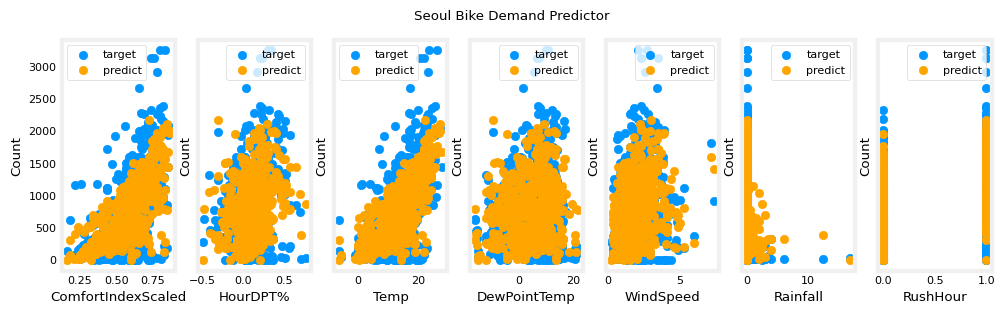

In [18]:
my_pred = model_C.predict(mx_test)
my_pred = np.maximum(0, my_pred)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Count"); ax[i].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [19]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5943048164609447


* Score is much higher than previously, however still stops at ~0.8

In [20]:
print(model_C.predict([[0.5,0.1,15,3,0.1,0.1,0.5]])) # not scaled

[1247.6117189]


In [21]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)
cost = table['Cost'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     ComfortIndexScaled  HourDPT%  Temp  DewPointTemp  WindSpeed  Rainfall  \
0                  0.48      0.06   9.7           7.1        1.7       0.0   
1                  0.86      0.58  25.6          16.1        0.7       0.0   
2                  0.42      0.01   6.7           1.9        2.1       0.0   
3                  0.53      0.01  11.5           7.6        2.0       0.0   
4                  0.41     -0.30   4.5          -7.9        1.3       0.0   
..                  ...       ...   ...           ...        ...       ...   
547                0.60      0.09  13.8           9.2        0.7       0.0   
548                0.50     -0.24   7.9          -9.9        1.0       0.0   
549                0.56      0.06  12.3           6.3        0.5       0.0   
550                0.33     -0.08   2.9          -2.2        1.2       0.0   
551                0.37      0.06   6.1           5.5        2.1       0.0   

     RushHour  Target  Predicted result    Cost  
0         0.0

* Similar to previous evaluation, however the average is worse due to negative outliers, suggesting poor feature scaling 

In [22]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 307.95586443865886
Coefficient: [-1903.24208021  1181.895521     116.38802559   -56.71841948
    25.02715979   -47.68893513   399.37678911]


* ComfortIndexScaled has the strongest negative influence on bike demand, suggesting that as the measured comfort index increases, count decreases

* HourDPT% shows a strong positive relationship, indicating that higher humidity levels increases count

### Polynominal Regression

In [23]:
filename = 'my_saved_model_v3.sav'
model_E = pickle.load(open(filename, 'rb'))

In [24]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* (Features are the same as before)

In [25]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(mx_test)

# Create the model
my_model = LinearRegression()

# Fit the model to the data
my_model.fit(poly_features, my_test)

LinearRegression()

* The LinearRegression model already includes an intercept term by default, so `include_bias=False`

* Polynominal features above 3 degrees led to overfitting, evident through negative training data scores

    * The degree results in good generalisation, meaning unseen data can be captured

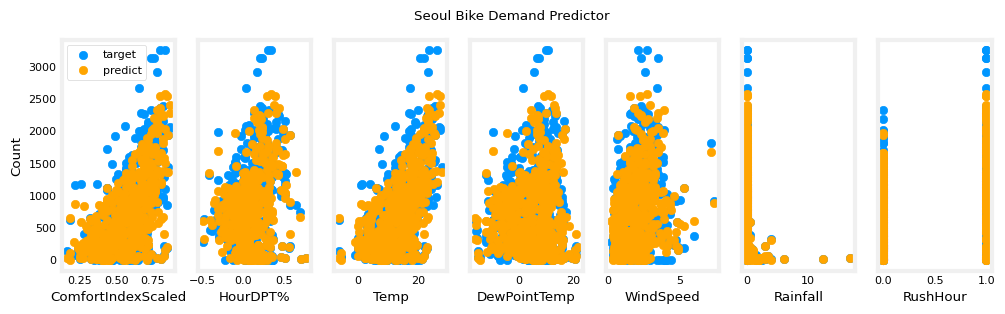

In [26]:
my_pred = my_model.predict(poly_features)
my_pred = np.maximum(0, my_pred)

if len(mx_col) == 1:
    plt.scatter(mx_test, my_pred)
    plt.scatter(mx_test, my_test, marker='x', c='r')
    plt.title("Seoul Bike Demand Predictor")
    plt.ylabel("Count")
    plt.xlabel(mx_col[0])
else:
    fig, ax = plt.subplots(1, len(mx_col), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(mx_test[:, i], my_test, label='target')
        ax[i].set_xlabel(mx_col[i])
        ax[i].scatter(mx_test[:, i], my_pred, color="orange", label='predict')
    ax[0].set_ylabel("Count")
    ax[0].legend()
    fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [27]:
test_score = model_E.score(poly_features, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.32269808907466546


* I had an issue where x and y were not the same size and fixed this by a 2D array

* Unlike linear regression, predictions reached above 0.8

* Polynominal worked well due to bell curve relationship (evident in data preview)

In [28]:
poly_features = poly.transform(mx_test)

predicted = model_E.predict(poly_features)

data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = predicted
data['Cost'] = (my_test) - (predicted.round(2))

# Create the DataFrame
table = pd.DataFrame(data)
print(table)
cost = table['Cost'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")


     ComfortIndexScaled  HourDPT%  Temp  DewPointTemp  WindSpeed  Rainfall  \
0                  0.48      0.06   9.7           7.1        1.7       0.0   
1                  0.86      0.58  25.6          16.1        0.7       0.0   
2                  0.42      0.01   6.7           1.9        2.1       0.0   
3                  0.53      0.01  11.5           7.6        2.0       0.0   
4                  0.41     -0.30   4.5          -7.9        1.3       0.0   
..                  ...       ...   ...           ...        ...       ...   
547                0.60      0.09  13.8           9.2        0.7       0.0   
548                0.50     -0.24   7.9          -9.9        1.0       0.0   
549                0.56      0.06  12.3           6.3        0.5       0.0   
550                0.33     -0.08   2.9          -2.2        1.2       0.0   
551                0.37      0.06   6.1           5.5        2.1       0.0   

     RushHour  Target  Predicted result    Cost  
0         0.0

* Model works well or generalises

* Line 540 is shows discrepancies, possibly due to poor feature scaling or outliers (a common trend)

In [29]:
print(f'X Axis intercept: {model_E.intercept_}') # not scaled
print(f'Coefficient: {model_E.coef_}')

X Axis intercept: -1473.883388171057
Coefficient: [ 2.51591928e+04 -7.00808191e+03 -5.46243125e+02 -4.95288260e+02
 -3.75842979e+02 -2.05899109e+04 -7.51633916e+02 -1.10615965e+05
  5.28527979e+03  5.75412860e+03  2.93321103e+03  3.09384680e+03
  2.01746970e+05  1.02099137e+04  2.91422665e+04  1.79350155e+03
 -2.28127937e+03  5.61841875e+03 -8.21472788e+03 -2.10221946e+03
 -5.73966571e+01 -1.18582256e+02 -2.45192053e+02 -4.75806102e+03
 -2.47704304e+02  4.05404955e+01  2.04577919e+01 -9.42153039e+02
  3.11893068e+01 -9.60656083e+01  7.66490899e+02  9.25434029e+01
 -8.86724291e+01  2.30595953e+03 -7.51635003e+02  8.55075545e+04
 -6.56714014e+03 -6.14736193e+03 -4.79567618e+03  3.49856809e+03
 -4.85583206e+05 -3.99566399e+04 -7.74176099e+04 -2.61234669e+03
  4.61870269e+03 -1.65490431e+04  4.16426386e+04  4.84672919e+03
  8.83043440e+01  3.38202431e+02  1.01355864e+02  2.22764730e+04
  1.92726455e+03 -7.92059989e+01  1.63365682e+02  4.93184344e+03
 -3.81853244e+01  8.55643248e+01 -4.4728

* Many coefficients due to the nature of polynominal regression

#### Step 11

* Polynominal regression model renamed to `my_model`

Move to [3.operations\3.1.deploy_model](/workspaces/2025SE-Roman.Lac-Task2/3.operations/3.1.deploy_model/3.1.1.basic_model_depolyment.ipynb) folder.